In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [2]:
filename = 'fourmiliere_quatre.txt'

with open(filename, "r") as file:
    lines = file.readlines()

nb_ants = 0
rooms = {}
tunnels = []

for line in lines: 
    line = line.strip()

    if line.startswith("f="):
        nb_ants = int(line.split('=')[1])
    elif line.startswith("S") and "-" not in line:
        if "{" in line:
            room, capacity = line.split("{")
            room = room.strip()
            capacity = int(capacity.split("}")[0].strip())

        else:
            room = line.strip()
            capacity = 1

        rooms[room] = capacity

    elif "-" in line:
        room1, room2 = line.split("-")
        tunnels.append((room1.strip(), room2.strip()))
    


In [3]:
G = nx.Graph()

for room, capacity in rooms.items():
    G.add_node(room, capacity = capacity)

for tunnel in tunnels:
    G.add_edge(*tunnel)

print("Number of ants:", nb_ants)
print("Rooms and capacity:", rooms)
print("Tunnels:", tunnels)

Number of ants: 10
Rooms and capacity: {'S1': 2, 'S2': 1, 'S3': 1, 'S4': 2, 'S5': 1, 'S6': 1}
Tunnels: [('S3', 'S4'), ('Sv', 'S1'), ('S1', 'S2'), ('S2', 'S4'), ('S4', 'S5'), ('S5', 'Sd'), ('S4', 'S6'), ('S6', 'Sd'), ('S1', 'S3')]


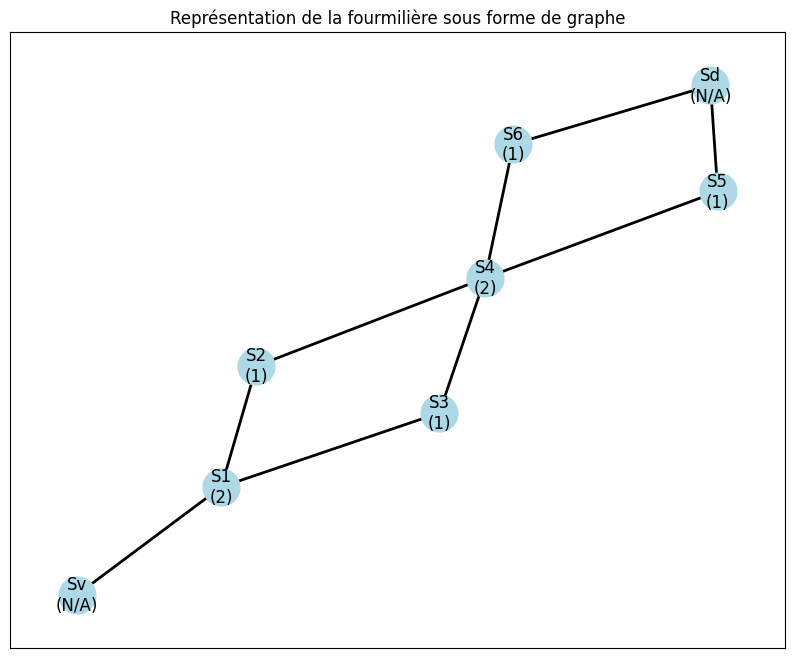

In [4]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

nx.draw_networkx_edges(G, pos, width=2)

labels = {
    node: f"{node}\n({G.nodes[node].get('capacity', 'N/A')})" for node in G.nodes
}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')

plt.title("Représentation de la fourmilière sous forme de graphe")
plt.show()


In [5]:
G = nx.Graph()

# Ajouter les nœuds avec leurs capacités
for room, capacity in rooms.items():
    G.add_node(room, capacity=capacity)

# Ajouter les arêtes (tunnels)
for tunnel in tunnels:
    G.add_edge(*tunnel)

# Initialisation des fourmis dans le vestibule
ants = deque([f"f{i+1}" for i in range(nb_ants)])

# Initialisation des capacités des salles (en supposant que toutes les salles ont une capacité de 1 par défaut)
for room in G.nodes:
    G.nodes[room]['capacity'] = rooms.get(room, 1)

# Étapes de déplacement
step = 1
while ants:
    print(f"+++ E{step} +++")
    step += 1
    
    moves = []
    used_paths = set()  # Suivi des chemins utilisés cette étape

    # Déplacement des fourmis à partir du vestibule
    for _ in range(len(ants)):
        if not ants:
            break
        
        current_ant = ants.popleft()

        # Vérifier les salles adjacentes au vestibule
        for neighbor_room in G.neighbors('Sv'):
            if G.nodes[neighbor_room]['capacity'] > 0:
                moves.append(f"{current_ant} - Sv - {neighbor_room}")
                G.nodes[neighbor_room]['capacity'] -= 1
                break
    
    # Déplacement des fourmis depuis les salles intermédiaires vers le dortoir
    for move in moves:
        _, _, start_room = move.split(' - ')
        
        if start_room != 'Sd':
            for next_room in G.neighbors(start_room):
                if G.nodes[next_room]['capacity'] > 0:
                    moves.append(f"{current_ant} - {start_room} - {next_room}")
                    G.nodes[next_room]['capacity'] -= 1
                    break
    
    # Afficher les déplacements de l'étape
    for move in moves:
        print(move)
    
    # Réinitialiser la capacité des salles intermédiaires pour la prochaine étape
    for room in G.nodes:
        if room not in ['Sv', 'Sd']:
            G.nodes[room]['capacity'] = rooms.get(room, 1)
    
    print()

+++ E1 +++
f1 - Sv - S1
f2 - Sv - S1
f10 - S1 - Sv
f10 - S1 - S2
f10 - S2 - S4
f10 - S4 - S3
f10 - S3 - S4
f10 - S4 - S5
f10 - S5 - Sd

